In [1]:
#plot to see which direction the people with sel goes. 
df['diff_SEL_SEL_IHE'] = df['SEL']-df['SEL_IHE']
df['diff_SEL_SEL_IHE'].hist()

NameError: name 'df' is not defined

In [1]:
import urllib.request
import pandas as pd
import numpy as np
# !pip install scipy
from scipy import stats
import datetime

#plot stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

def setup_mpl():
    mpl.rcParams["font.family"] = "Calibri"
    mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

In [ ]:
# fig, ax = plt.subplots(2,2, figsize=(15,10))


# for i in range(4):
#     x, y = data[i].x, data[i].y
#     print(f"Data {i+1}:")
#     print(f"\t Mean x = {x.mean():.2f} \n\t Mean y =  {y.mean():.2f}")
#     print(f"\t Var x = {x.var():.3f} \n\t Var y =  {y.var():.3f}")
#     print(f"\t Pearson correlation = {stats.pearsonr(x, y)[0]:.3f}")
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#     print(f"\t Slope = {slope:.3f}")
#     print(f"\t Intercept = {intercept:.3f}")
#     ax = plt.subplot(2, 2, i+1)
#     ax.set_title("Some dummy data")
#     ax.scatter(x,y, label = '(x,y)')
#     ax.plot(x, intercept+slope*x, "-r", label = 'Linear regression')
#     ax.set_xlim(0, 20)
#     ax.set_ylim(0, 14)
# #     ax.legend(['Linear regression', '(x,y)'], loc='upper left')
#     ax.legend(loc = 'upper left')
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
    
# plt.show()

In [4]:
df = pd.read_csv("df_sum_score.csv")

In [5]:
df

,Unnamed: 0,GENDER,CR_S11,CC_S11,ENG_S11,TOTAL_SCORE_S11,CR_PRO,CC_PRO,ENG_PRO,TOTAL_SCORE_PRO
0,0,F,81,61,82,224,93,71,93,257
1,1,F,75,66,88,229,38,86,98,222
2,2,M,49,38,42,129,1,18,43,62
3,3,F,55,51,73,179,35,76,80,191
4,4,M,65,76,92,233,94,98,100,292
...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,69,70,81,220,71,86,87,244
12407,12407,M,57,61,53,171,39,44,11,94
12408,12408,M,69,75,58,202,88,90,81,259
12409,12409,F,69,64,52,185,80,51,8,139


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


def Ridgeline_dists(df,x, metric="",plot_label=""):

    df_temp = df.copy()
    # df_temp = df_temp.loc[df_temp["GENDER"] == GENDER]
#     df_temp.email = df_temp.email.str.split("@").str[0]

    x = x #df_temp.TOTAL_SCORE_S11
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))

    # The order of the emails in relation to their email
    # df_kat_order = df_kat.groupby(["g"]).mean()
    df_kat_order = df_kat.groupby(["g"]).count()

    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # email = df_kat_order.index
    # email = email.to_frame(index=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        # hue_order=email.g,
        aspect=15,
        height=0.5,
        palette=pal,
        # row_order=email.g,
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes,
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)


C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate 

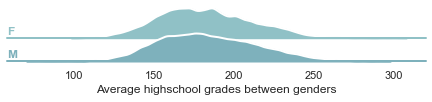

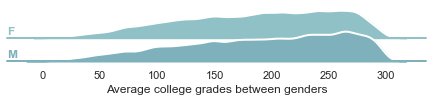

In [46]:
Ridgeline_dists(df,x=df.TOTAL_SCORE_S11,plot_label='Average highschool grades between genders')
Ridgeline_dists(df,x=df.TOTAL_SCORE_PRO,plot_label='Average college grades between genders')

# Ridgeline_dists(df,x=df.TOTAL_SCORE_S11)